# Exploration of GABA Receptors

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

### Prepare data for CYBERSORT input file format

In [106]:
f = pd.read_table('/cellar/users/agross/Downloads_Old/LM22.txt',
                 index_col=0)

In [69]:
df = matched_tn
df = df.ix[f.index]
df = df.dropna()
df = 2 ** df
df.columns = ['-'.join(c) for c in df.columns]

In [70]:
df.shape

(513, 1298)

In [71]:
df.to_csv('/cellar/users/agross/Desktop/TCGA_for_CIBERSORT.tab', sep='\t')

In [144]:
cs = pd.read_csv('/cellar/users/agross/Data/DiffExp/CIBERSORT/CIBERSORT.Output_matched_tn_subread.csv', 
                 index_col=0)
cs = FH.fix_barcode_columns(cs.T).T

In [145]:
cs.shape

(1298, 25)

In [146]:
cs.head(6).T

TCGA-22-4593        TCGA-22-4609        TCGA-22-5471      
                                        01    11            01    11            01    11
B cells naive                     3.92e-02  0.01          0.00  0.00          0.00  0.01
B cells memory                    0.00e+00  0.00          0.00  0.00          0.00  0.00
Plasma cells                      7.83e-02  0.00          0.05  0.00          0.01  0.03
T cells CD8                       7.31e-02  0.04          0.07  0.09          0.27  0.06
T cells CD4 naive                 0.00e+00  0.00          0.00  0.00          0.00  0.00
T cells CD4 memory resting        2.96e-01  0.24          0.17  0.27          0.00  0.11
T cells CD4 memory activated      0.00e+00  0.00          0.06  0.00          0.09  0.00
T cells follicular helper         0.00e+00  0.00          0.00  0.00          0.05  0.02
T cells regulatory (Tregs)        0.00e+00  0.00          0.00  0.00          0.02  0.01
T cells gamma delta               0.00e+00  0.00          0.00  0.00          0.00  0.00
NK cells resting                  5.64e-02  0.01          0.04  0.10          0.00  0.03
NK cells activated                0.00e+00  0.01          0.00  0.00          0.11  0.03
Monocytes                         0.00e+00  0.28          0.00  0.08          0.00  0.05
Macrophages M0                    2.32e-01  0.12          0.34  0.12          0.15  0.32
Macrophages M1                    2.82e-02  0.02          0.07  0.04          0.11  0.01
Macrophages M2                    2.99e-02  0.13          0.19  0.10          0.13  0.17
Dendritic cells resting           5.00e-04  0.00          0.00  0.00          0.01  0.01
Dendritic cells activated         0.00e+00  0.04          0.00  0.06          0.02  0.00
Mast cells resting                0.00e+00  0.03          0.00  0.00          0.00  0.08
Mast cells activated              1.49e-01  0.01          0.00  0.13          0.02  0.00
Eosinophils                       0.00e+00  0.00          0.00  0.00          0.00  0.02
Neutrophils                       1.78e-02  0.05          0.00  0.00          0.00  0.03
P-value                           7.00e-02  0.01          0.00  0.03          0.00  0.02
Pearson Correlation               1.39e-01  0.32          0.43  0.21          0.50  0.23
RMSE                              1.04e+00  0.96          0.91  1.01          0.87  1.01

In [147]:
v = cs[[c for c in cs.columns if c.startswith('T cells')]].sum(1)
v = v[:, '01'] - v[:, '11']

In [185]:
dd = cs.ix[ti(cs['Pearson Correlation'] > .1)].T
dd = dd.xs('01',1,1) - dd.xs('11',1,1)
dd = dd.ix[:-3]
dd.shape

(22, 493)

In [186]:
r1 = screen_feature(df_s3.ix['GABRD'][:,'11'].ix[dd.columns], pearson_pandas, 
               cs.T.ix[:-3].xs('11',1,1), align=False)
r2 = screen_feature(df_s3.ix['GABRD'][:,'01'].ix[dd.columns], pearson_pandas, 
               cs.T.ix[:-3].xs('01',1,1), align=False)

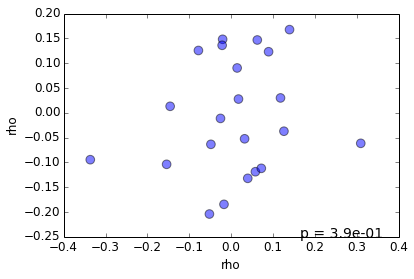

In [187]:
series_scatter(r1.rho, r2.rho)

In [190]:
screen_feature(dx.ix['GABRD'], spearman_pandas, dd, align=False).head()

,rho,p,q
Plasma cells,-0.33,1.42e-07,3.12e-06
Monocytes,0.26,3.39e-05,3.72e-04
Macrophages M2,-0.21,1.18e-03,8.63e-03
Neutrophils,0.19,3.12e-03,1.72e-02
Macrophages M0,0.16,1.29e-02,5.68e-02


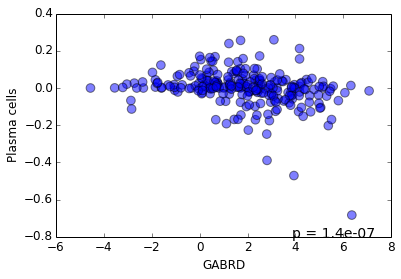

In [191]:
series_scatter(dx.ix['GABRD'], dd.ix['Plasma cells'])

In [180]:
b = (cs['T cells regulatory (Tregs)'] > 0).astype(int).unstack().T.diff().ix['11']

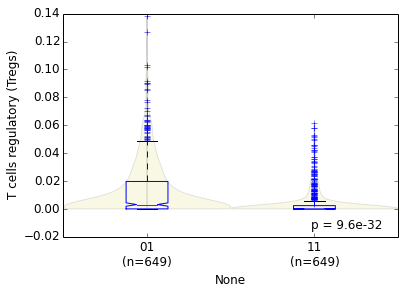

In [192]:
violin_plot_series(cs['T cells regulatory (Tregs)'])